### What we'll do?
This blog is about implementing the Linear Regression algorithm from scratch. You might ask, _"Why implementing it from scratch when there are fantastic libraries that does the same thing in about 5 lines of code?"_. That is a valid question! You can look up to **scikit-learn** documentation an code it on your own, but it will be a black box for you. You are never sure why that works, and how that works. Implementing a similiar algorithm on your own will definitely give you a clearer picture.

Just a gentle reminder, we'll never us our implementations in real life (Actually you can, but I won't recommend though!). These implementations are just for our understanding.

### Preparing and making our dummy data
I'm using scikit-learn's `make_regression` method to generate our data. 

In [9]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

data = make_regression(n_samples=5000, n_features=5, n_informative=5, noise=5, random_state=42)
# n_feature: Specify how many features we need (The dimension of a single data point).
# n_formative: Specify how many features are useful for us.
# noise: Amount of random noise we inject into the data. 
X = data[0]
y = data[1]
print("Shape of X, y = ",X.shape,y.shape)

Shape of X, y =  (5000, 5) (5000,)


Since we have a 5D independent variable, we'll use [OLS for matrice](https://chandu-4444.github.io/2021/12/07/linear-regression.html#ols-for-matrices)
I'll create a class for the implementation. This is how models were implemented in **scikit-learn**. 

In [12]:
class LinearRegression:

    def __init__(self):
        self.X = None
        self.y = None
        self._W = None
        self.y_hat = None
        

    def fit(self, X, y):
        ones = np.ones(shape=(X.shape[0], 1), dtype=float) # Generates a vector of shape (5000, 1)
        self.X = np.concatenate((X, ones), axis=1) # Concatenate the ones column to the end of matrix X
        self._W = np.empty(shape=[self.X.shape[1], 1], dtype=float) # Generate a random W array
        self._W =  np.dot(np.dot(np.linalg.inv(np.matmul(self.X.T, self.X)), self.X.T), y) # W = ((X'X)^-1)X'.y
        self.y_hat = np.dot(self.X, self._W)

        return self.y_hat, self._W

    def predict(self, x):
        # Predicting the given query after concatenating a one to it.
        # Predicting by y = mx + c, here m = W[:-1], c = W[-1] (Last column is intercept term)
        return  np.dot(x, self._W[:-1]) + self._W[-1] 
    
    def SSE(self, y, y_hat):
        return np.sum((y - y_hat)**2)

In [4]:
model = LinearRegression()
y_hat, W = model.fit(X, y)

In [8]:
model.SSE(y, y_hat)

122552.17271809423

Now, we'll plot _y_hat_ against _y_. That'll be a straight line passing though origin with slope $45 \deg$. This indicates that our _y_hat_ and _y_ follows the line equation x = y. This shows us that our predictions are almost close to the actual values.

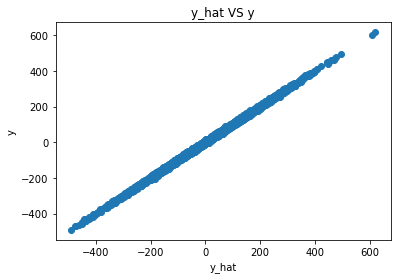

In [8]:
plt.scatter(y_hat, y)
plt.xlabel("y_hat")
plt.ylabel("y")
plt.title("y_hat VS y")
plt.savefig("output.svg")